In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

try:
    from mglearn.datasets import load_extended_boston
except:
    import sys
    !{sys.executable} -m pip install mglearn
finally:
    from mglearn.datasets import load_extended_boston
    
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso



  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
boston = load_boston()

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_.reshape(-1)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [14]:
model.intercept_

array([36.45948839])

In [15]:
model.coef_.reshape(-1)

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [16]:
for feature in zip(boston['feature_names'], model.coef_.reshape(-1)):
    print(feature)
print('intercept', model.intercept_)

('CRIM', -0.10801135783679539)
('ZN', 0.04642045836687953)
('INDUS', 0.020558626367068917)
('CHAS', 2.6867338193448442)
('NOX', -17.766611228299986)
('RM', 3.8098652068092282)
('AGE', 0.0006922246403431768)
('DIS', -1.47556684560025)
('RAD', 0.30604947898516427)
('TAX', -0.012334593916574021)
('PTRATIO', -0.9527472317072921)
('B', 0.00931168327379375)
('LSTAT', -0.5247583778554881)
intercept [36.45948839]


In [17]:
model.score(X_train, y_train)

0.7485269826445833

In [18]:
model.score(X_test, y_test)

0.6921281240846036

# Ridge Regression

In [19]:
X, y = load_extended_boston()

In [21]:
len(X[0])

104

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.score(X_train, y_train)

0.9490240966612833

In [28]:
lm.score(X_test, y_test)

0.6158858584078775

In [29]:
lm.coef_

array([-4.90159819e+02, -4.00626206e+01, -1.25287218e+02, -8.91375244e+00,
       -8.06560621e+00,  3.28101194e+01,  4.65516841e+01, -6.27045004e+01,
        2.87358042e+01,  3.34139738e+01, -6.80132101e-01, -9.31619287e+00,
       -1.61133582e+01,  1.21301779e+01,  2.21565994e+03,  1.53054044e+03,
        1.24461620e+02, -1.27347248e+01,  4.24938302e+01, -3.54781532e+01,
        8.91645918e+00,  1.22299456e+03, -2.15366399e+03,  2.74716329e+02,
       -1.41233559e+00,  4.33324936e+01, -1.24082513e+01, -1.69004641e+01,
       -6.04317656e+00, -8.15771683e+01,  9.02286325e+00,  4.10360549e-01,
       -3.67270441e+00, -7.08564514e+00,  3.56048971e+01, -1.22564863e+01,
        5.79039071e+01, -1.52297806e+01,  3.98426090e+01,  5.64809836e+00,
        1.89043119e-01,  5.46913714e+01,  1.85814845e+01,  5.47572005e+01,
       -4.58182836e+01,  2.16098573e+01, -1.01744270e+01,  5.46020392e+01,
       -1.78903568e+01, -8.91375244e+00, -1.71954300e+01, -3.15047685e+01,
        2.78399230e+00,  

<BarContainer object of 104 artists>

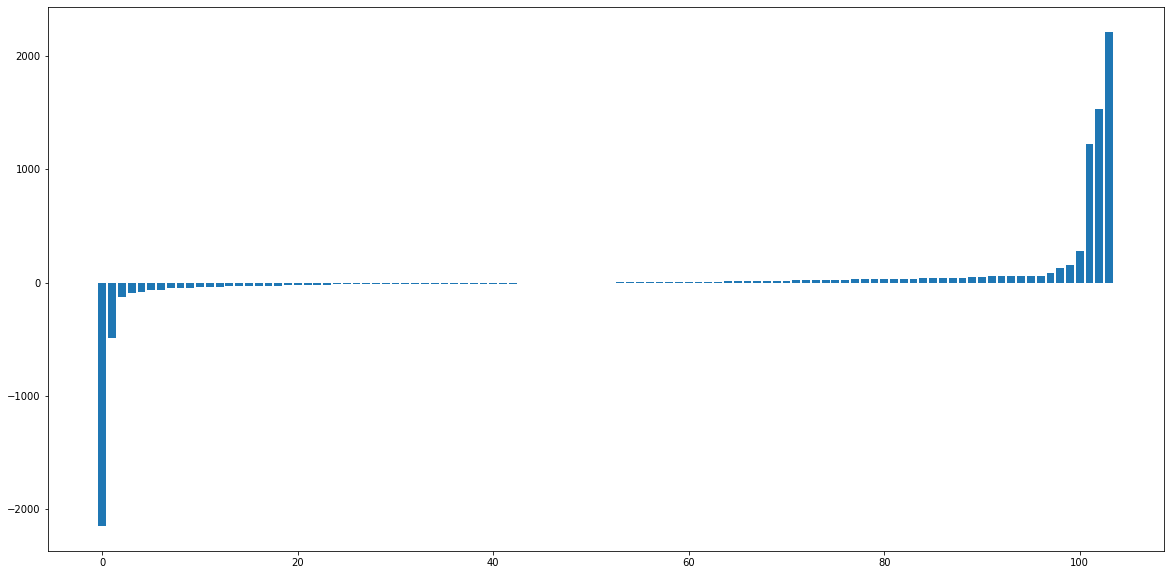

In [30]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))

<BarContainer object of 104 artists>

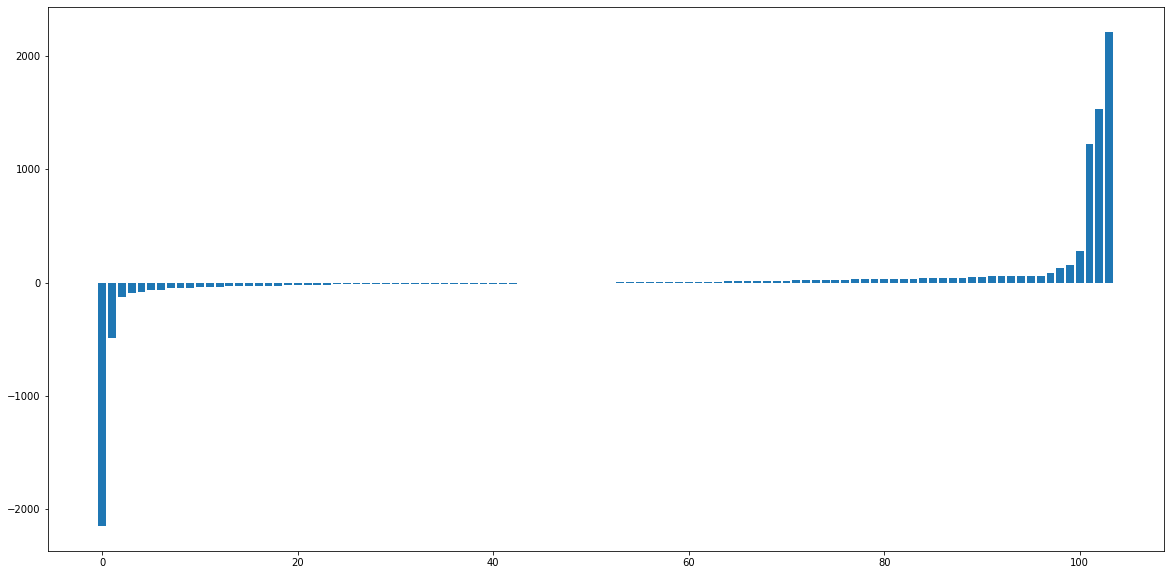

In [38]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(lm.coef_)), np.sort(lm.coef_, axis=0))


# Ridge

In [33]:
Rm = Ridge(alpha=0.1)
Rm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
Rm.score(X_train, y_train)

0.9261926604874953

In [36]:
Rm.score(X_test, y_test)

0.7463824108919297

<BarContainer object of 104 artists>

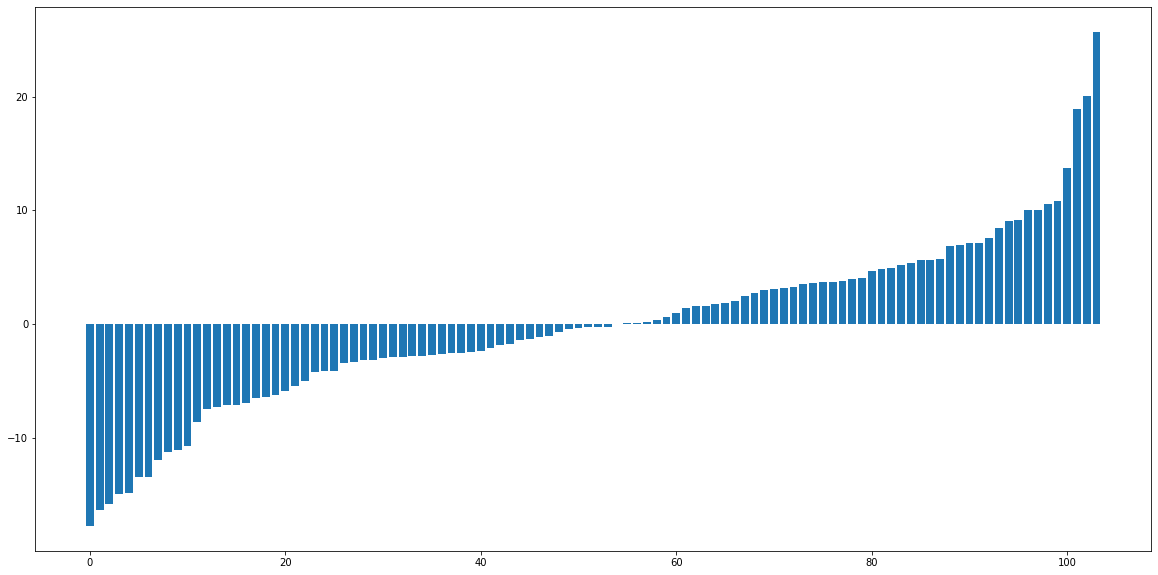

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(Rm.coef_)), np.sort(Rm.coef_, axis=0))

In [39]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm


C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T


alpha:0.0, train: 0.949024096661283, test: 0.61588585839754
alpha:0.1, train: 0.9261926604874953, test: 0.7463824108919297
alpha:0.2, train: 0.9183092048526234, test: 0.7483699744604826
alpha:0.3, train: 0.9123282530642607, test: 0.746069787083119
alpha:0.4, train: 0.9072989000889832, test: 0.7427602446356624
alpha:0.5, train: 0.902879416235023, test: 0.7391528134070406
alpha:0.6, train: 0.8988994292523822, test: 0.735483607189646
alpha:0.7, train: 0.8952587207175312, test: 0.7318475397585713
alpha:0.8, train: 0.8918919158110435, test: 0.7282862105324313
alpha:0.9, train: 0.8887532342331406, test: 0.7248179421659836
alpha:1.0, train: 0.885808929210358, test: 0.7214499108060962
alpha:1.1, train: 0.8830331463662006, test: 0.7181836425473915
alpha:1.2, train: 0.8804054770468998, test: 0.7150177179456932
alpha:1.3, train: 0.8779094238671834, test: 0.7119491844859882
alpha:1.4, train: 0.8755313910021427, test: 0.7089743261797231
alpha:1.5, train: 0.8732599931262279, test: 0.706089094839196


In [40]:
best_model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
 best_model.coef_

array([-2.32039251e+00, -4.55023554e+00, -4.02450794e+00,  8.86118061e-02,
        1.56000790e+00,  1.44707705e+01,  1.48165432e+00, -8.54707506e+00,
        8.17432611e+00, -5.80096512e-02, -5.85449421e-01,  4.26076226e+00,
       -2.67733638e+00,  4.59148489e+00, -2.17190432e-03, -1.10612140e+00,
        2.81347145e+00, -2.55240482e+00,  1.64987188e-01, -2.96816176e+00,
       -4.21540642e-02, -2.81190093e+00, -2.20508097e+00, -2.19332265e+00,
       -5.56097443e-01, -1.62082924e+00,  3.48461370e+00, -2.77473283e+00,
        2.67312934e+00, -1.43958541e+00,  7.75403890e+00, -3.65695799e+00,
       -1.22938767e-02,  1.99254666e+00,  1.54771379e+00,  2.35417658e+00,
       -3.01190114e+00, -5.43293451e+00,  5.45616336e+00,  2.98236430e+00,
        6.10312529e+00, -1.20172364e+00,  5.59337675e+00, -5.49812362e+00,
        3.93069148e+00,  5.74961775e+00, -5.64158695e+00, -7.85189944e-02,
       -1.12337923e+01,  8.86118061e-02, -1.11214899e+01, -1.17542226e+01,
        3.09879302e+00, -

<BarContainer object of 104 artists>

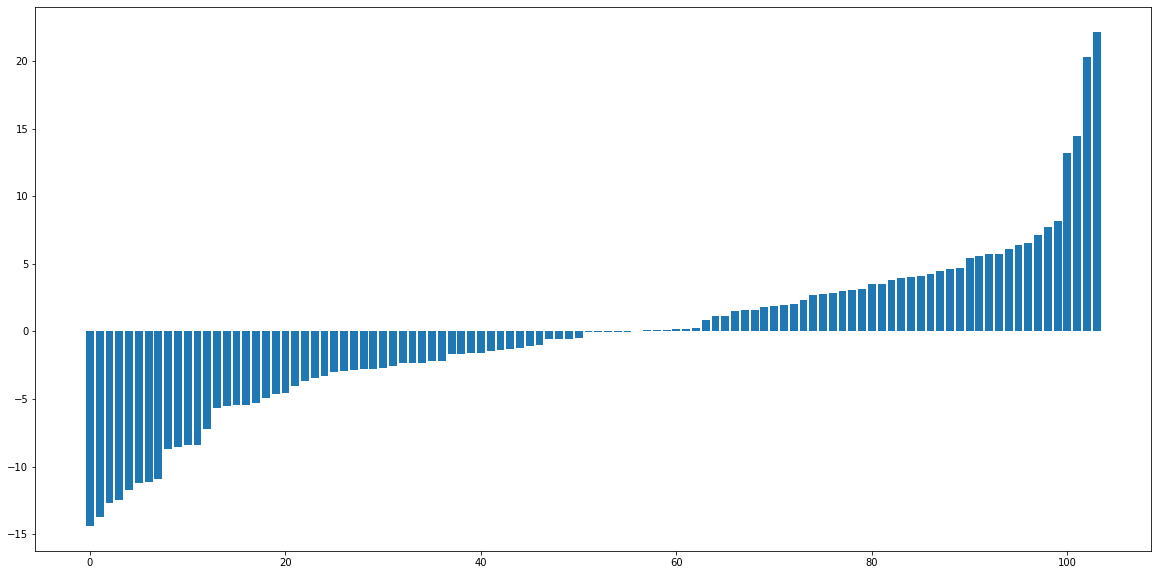

In [44]:
n = np.arange(len(best_model.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(best_model.coef_, axis=0))

In [43]:
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)
    
train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(10, train_score, test_score))


alpha:10, train: 0.7934484752213662, test: 0.5886807784434769


In [ ]:
rm.coef_

### cross validation with Ridge

In [45]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    rm = Ridge(alpha=i)
    rm.fit(X_train, y_train)
    
    
    train_score = rm.score(X_train, y_train)
    test_score = rm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = rm
    
    # cross validation scores
    cross_scores = cross_val_score(rm, X, y, cv=5)
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = rm



C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.41362e-19): result may not be accurate.
  overwrite_a=True).T


alpha:0.0, train: 0.949024096661283, test: 0.61588585839754
alpha:0.1, train: 0.9261926604874953, test: 0.7463824108919297
alpha:0.2, train: 0.9183092048526234, test: 0.7483699744604826
alpha:0.3, train: 0.9123282530642607, test: 0.746069787083119
alpha:0.4, train: 0.9072989000889832, test: 0.7427602446356624
alpha:0.5, train: 0.902879416235023, test: 0.7391528134070406
alpha:0.6, train: 0.8988994292523822, test: 0.735483607189646
alpha:0.7, train: 0.8952587207175312, test: 0.7318475397585713
alpha:0.8, train: 0.8918919158110435, test: 0.7282862105324313
alpha:0.9, train: 0.8887532342331406, test: 0.7248179421659836
alpha:1.0, train: 0.885808929210358, test: 0.7214499108060962
alpha:1.1, train: 0.8830331463662006, test: 0.7181836425473915
alpha:1.2, train: 0.8804054770468998, test: 0.7150177179456932
alpha:1.3, train: 0.8779094238671834, test: 0.7119491844859882
alpha:1.4, train: 0.8755313910021427, test: 0.7089743261797231
alpha:1.5, train: 0.8732599931262279, test: 0.706089094839196


In [46]:
cross_best

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
cross_best.score(X_test, y_test)

0.7214499108060962

In [48]:
cross_best.score(X, y)

0.8538846761565939

<BarContainer object of 104 artists>

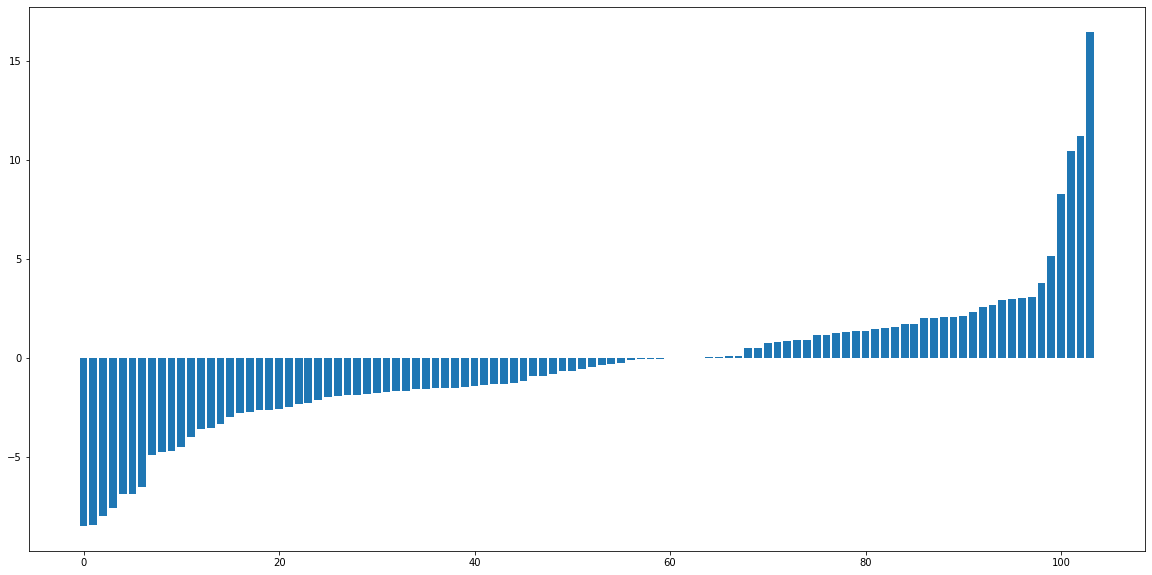

In [50]:
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [51]:
# 만약 알파값이 늘어나면??
rm = Ridge(alpha=0)
rm1 = Ridge(alpha=0.1)
rm2 = Ridge(alpha=0.5)
rm3 = Ridge(alpha=10)
rm4 = Ridge(alpha=20)

rm4 = Ridge(alpha=40)
rm5 = Ridge(alpha=80)

rm.fit(X_train, y_train)
rm1.fit(X_train, y_train)
rm2.fit(X_train, y_train)
rm3.fit(X_train, y_train)
rm4.fit(X_train, y_train)
rm5.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12548e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

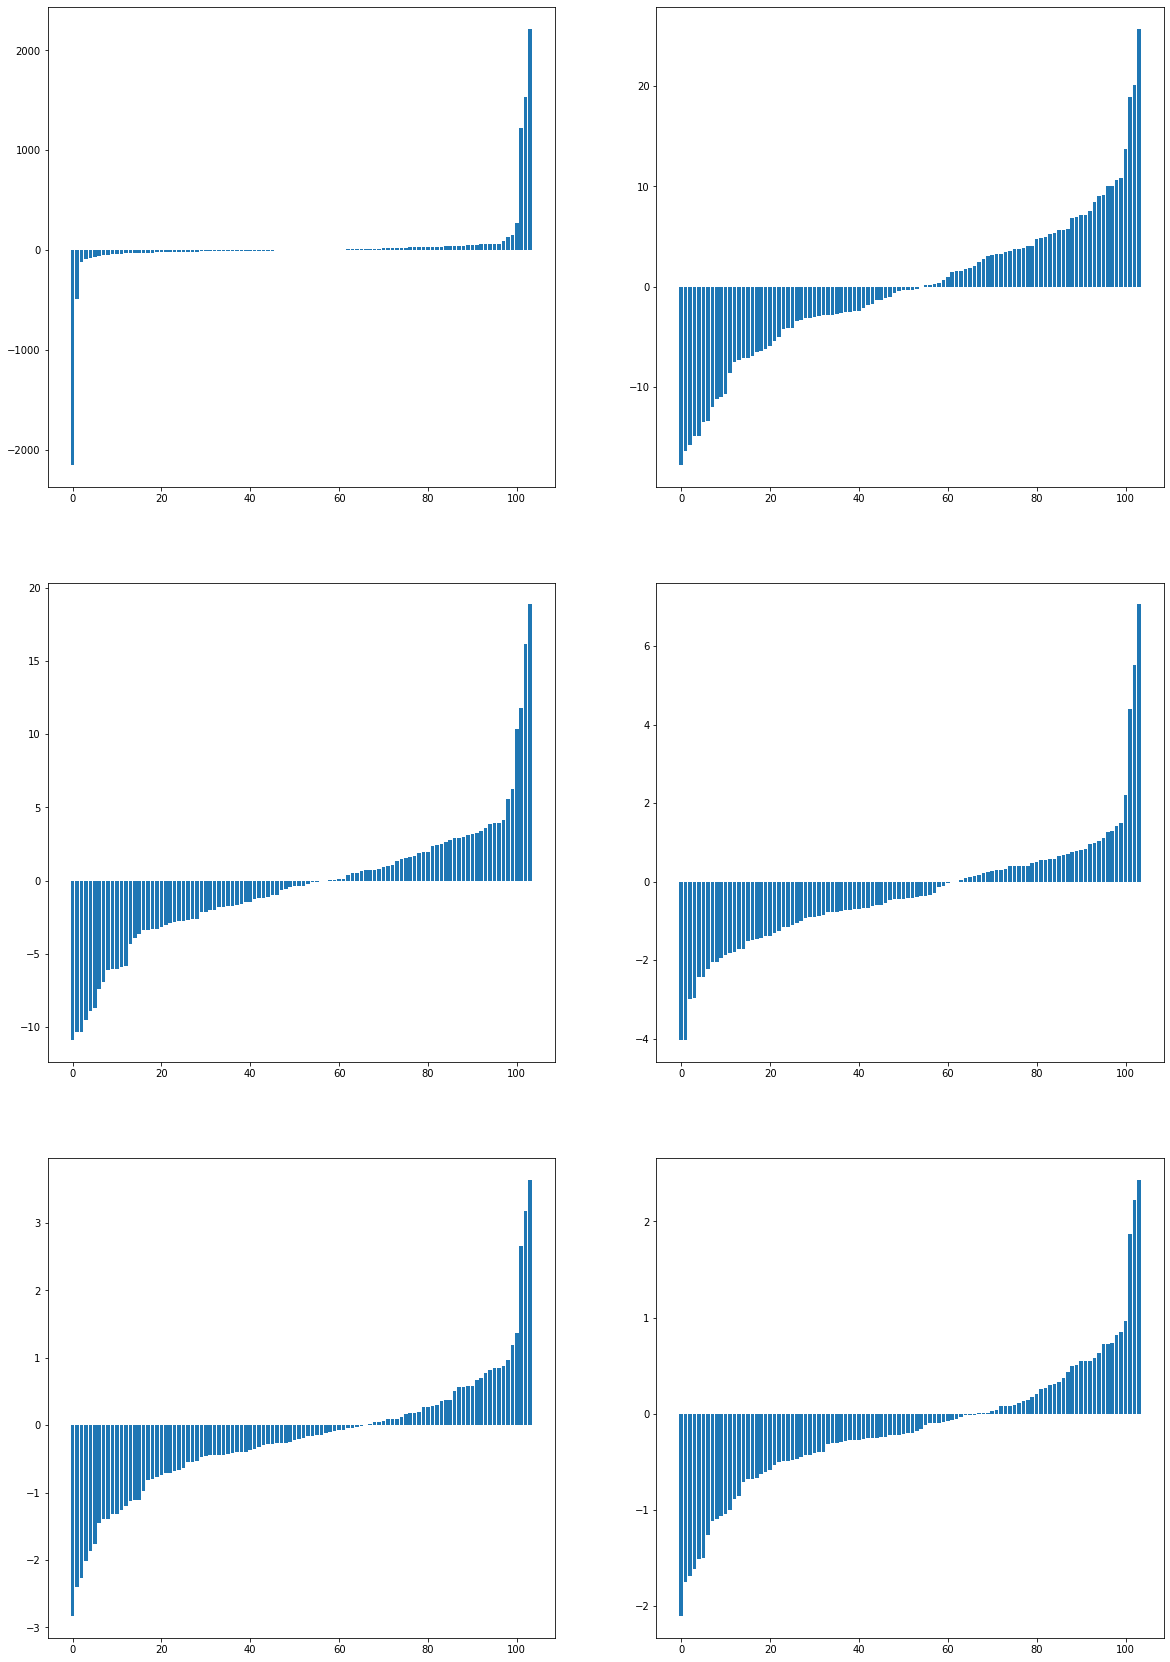

In [52]:
n = np.arange(len(rm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(rm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(rm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(rm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(rm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(rm4.coef_, axis=0))

plt.subplot(3,2,6)
plt.bar(n, np.sort(rm5.coef_, axis=0))
plt.show()

[-4.90159819e+02 -4.00626206e+01 -1.25287218e+02 -2.09664274e+01
 -8.06560621e+00  3.28101194e+01  4.65516841e+01 -6.27045004e+01
  2.87358042e+01  3.34139738e+01 -6.80132106e-01 -9.31619287e+00
 -1.61133582e+01  1.21301779e+01  2.21565994e+03  1.53054044e+03
  1.24461620e+02 -1.27347248e+01  4.24938302e+01 -3.54781532e+01
  8.91645918e+00  1.22299456e+03 -2.15366400e+03  2.74716329e+02
 -1.41233559e+00  4.33324936e+01 -1.24082513e+01 -1.69004641e+01
 -6.04317656e+00 -8.15771683e+01  9.02286325e+00  4.10360549e-01
 -3.67270440e+00 -7.08564514e+00  3.56048971e+01 -1.22564863e+01
  5.79039071e+01 -1.52297806e+01  3.98426090e+01  5.64809836e+00
  1.89043117e-01  5.46913714e+01  1.85814845e+01  5.47572005e+01
 -4.58182836e+01  2.16098573e+01 -1.01744270e+01  5.46020392e+01
 -1.78903569e+01  3.13892251e+00 -1.71954300e+01 -3.15047685e+01
  2.78399230e+00  2.27112765e+00  1.45281400e+01 -1.04841792e+01
 -9.52158347e+00  4.64199952e+01 -1.40725252e+01 -2.49545446e+00
  2.49619128e+01 -1.36250

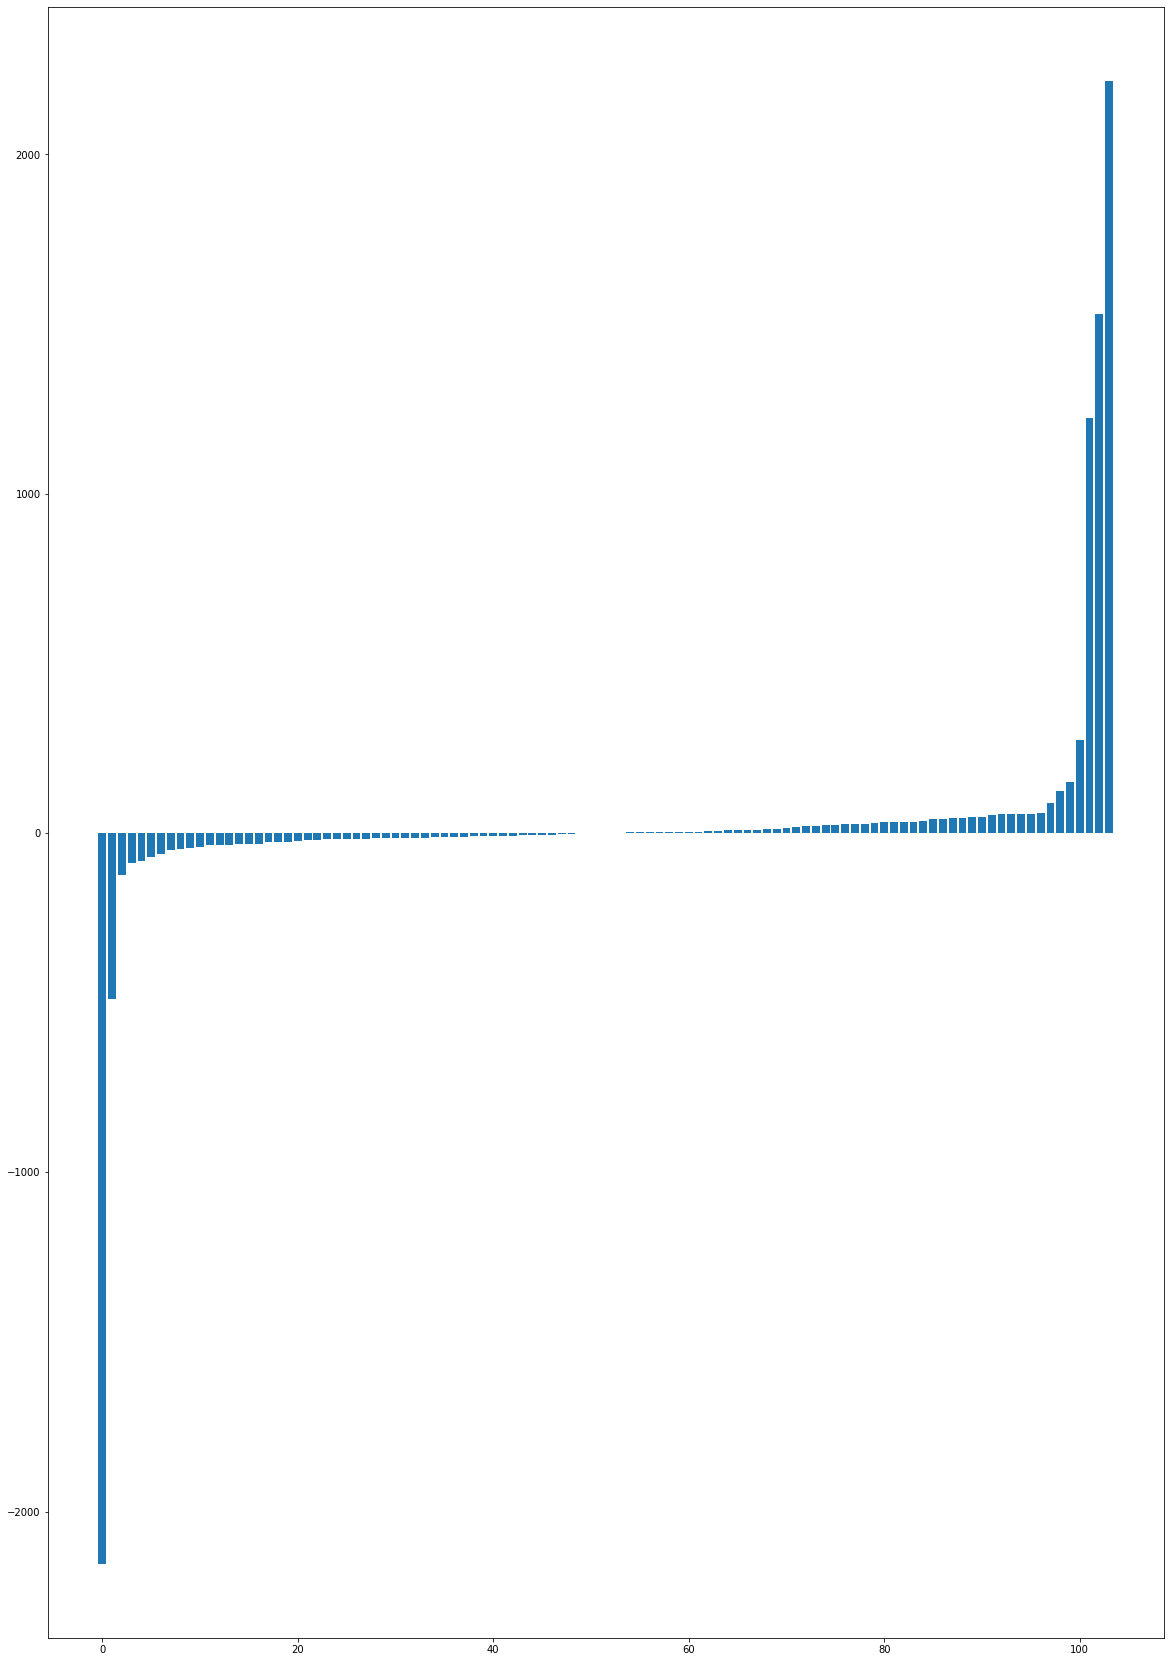

In [53]:
plt.figure(figsize=(20,30))
plt.bar(n, np.sort(rm.coef_, axis=0))

print(rm.coef_)

# Lasso

In [54]:
rm = Lasso(alpha=.1)
rm.fit(X_train, y_train)

train_score = rm.score(X_train, y_train)
test_score = rm.score(X_test, y_test)
print('alpha:{}, train: {}, test: {}'.format(0.1, train_score, test_score))


alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589


In [55]:
minimum_score = -100
minimum_alpha = 0
best_model = None
for i in list(range(0, 100, 1)):
    i = i/10
    
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    
    
    train_score = lasso_model.score(X_train, y_train)
    test_score = lasso_model.score(X_test, y_test)
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lasso_model


C:\ProgramData\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.484891069324, tolerance: 3.4398062970297034
  positive)


alpha:0.0, train: 0.939503285870033, test: 0.690188038527979
alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589
alpha:0.2, train: 0.741706960113871, test: 0.548860731870187
alpha:0.3, train: 0.711305923952956, test: 0.5260288993761577
alpha:0.4, train: 0.6701047347406606, test: 0.4933276410317631
alpha:0.5, train: 0.6179416874902637, test: 0.4479702469409994
alpha:0.6, train: 0.5553606674106111, test: 0.38911618397709524
alpha:0.7, train: 0.49320860275008227, test: 0.33597460514957855
alpha:0.8, train: 0.42453929924611256, test: 0.2786313295595215
alpha:0.9, train: 0.35895973077606713, test: 0.22575931592355825
alpha:1.0, train: 0.30173392764195583, test: 0.18559880937915907
alpha:1.1, train: 0.23937088149562025, test: 0.14032096432643604
alpha:1.2, train: 0.17106794012348725, test: 0.09027094180483342
alpha:1.3, train: 0.11186464241587157, test: 0.05262631982712018
alpha:1.4, train: 0.0695646489255729, test: 0.034841562341824894
alpha:1.5, train: 0.037261341223732924, test

In [56]:
best_model

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### cross validation with Lasso

In [76]:
lm = LinearRegression()
# lm.fit(X, y)
cross_scores = cross_val_score(lm, X, y, cv=5)
cross_scores

array([ 0.17270014, -2.24553502,  0.64430017,  0.22441297, -7.95698209])

In [77]:
minimum_score = -100
minimum_alpha = 0
best_model = None

cross_mean = -100
cross_alpha = 0
cross_best = None

for i in list(range(0, 100, 1)):
    i = i/10
    
    lm = Lasso(alpha=i)
    lm.fit(X_train, y_train)
    
    
    train_score = lm.score(X_train, y_train)
    test_score = lm.score(X_test, y_test)
    
    print('alpha:{}, train: {}, test: {}'.format(i, train_score, test_score))
    
    if minimum_score < test_score:
        minimum_score = test_score
        minimum_alpha = i
        best_model = lm
    
    # cross validation scores
    cross_scores = cross_val_score(lm, X, y, cv=5)
    _cross_mean, _corss_std = cross_scores.mean(), cross_scores.std()
        
    if cross_mean < _cross_mean:
        cross_mean = _cross_mean
        cross_alpha = i
        cross_best = lm



C:\ProgramData\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.484891069324, tolerance: 3.4398062970297034
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anac

alpha:0.0, train: 0.939503285870033, test: 0.690188038527979


C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1388.3824983834534, tolerance: 2.813643886419753
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843.7729760141156, to

alpha:0.1, train: 0.7734670612352095, test: 0.5788369599709589
alpha:0.2, train: 0.741706960113871, test: 0.548860731870187
alpha:0.3, train: 0.711305923952956, test: 0.5260288993761577
alpha:0.4, train: 0.6701047347406606, test: 0.4933276410317631
alpha:0.5, train: 0.6179416874902637, test: 0.4479702469409994
alpha:0.6, train: 0.5553606674106111, test: 0.38911618397709524
alpha:0.7, train: 0.49320860275008227, test: 0.33597460514957855
alpha:0.8, train: 0.42453929924611256, test: 0.2786313295595215
alpha:0.9, train: 0.35895973077606713, test: 0.22575931592355825
alpha:1.0, train: 0.30173392764195583, test: 0.18559880937915907
alpha:1.1, train: 0.23937088149562025, test: 0.14032096432643604
alpha:1.2, train: 0.17106794012348725, test: 0.09027094180483342
alpha:1.3, train: 0.11186464241587157, test: 0.05262631982712018
alpha:1.4, train: 0.0695646489255729, test: 0.034841562341824894
alpha:1.5, train: 0.037261341223732924, test: 0.019586718014321436
alpha:1.6, train: 0.017064600967774624

In [58]:
cross_best

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
cross_best.score(X_test, y_test)

0.690188038527979

<BarContainer object of 104 artists>

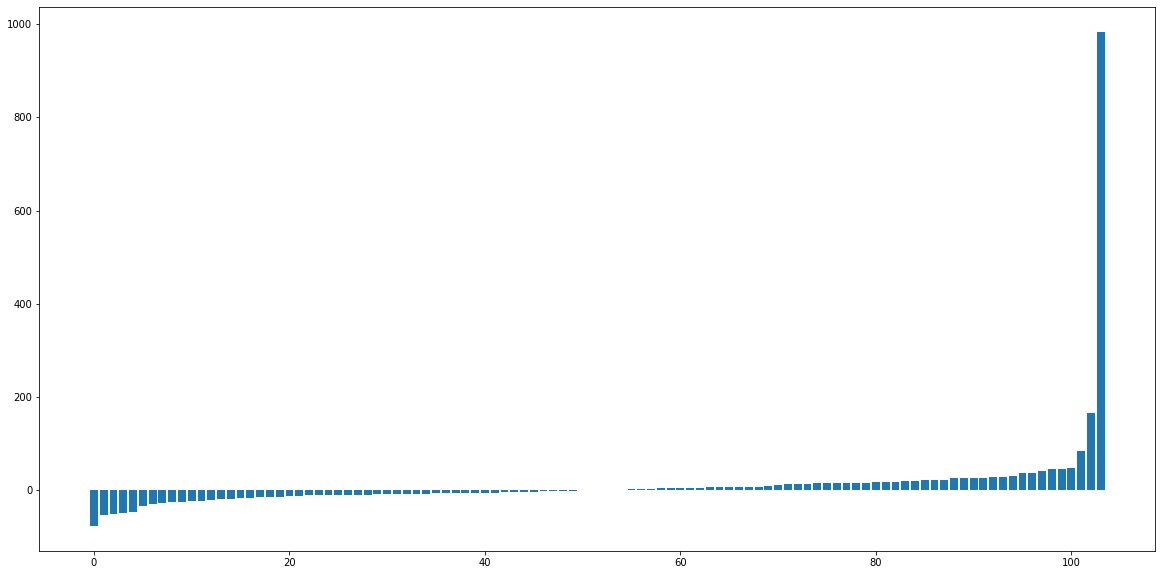

In [60]:
cross_best.score(X_test, y_test)
n = np.arange(len(cross_best.coef_))

plt.figure(figsize=(20,10))
plt.bar(n, np.sort(cross_best.coef_, axis=0))

In [82]:
# 만약 알파값이 늘어나면??
lm = Lasso(alpha=0)
lm1 = Lasso(alpha=.0001)
lm2 = Lasso(alpha=.5)
lm3 = Lasso(alpha=1)
lm4 = Lasso(alpha=2)
lm5 = Lasso(alpha=4)
lm6 = Lasso(alpha=8)


lm.fit(X_train, y_train)
lm1.fit(X_train, y_train)
lm2.fit(X_train, y_train)
lm3.fit(X_train, y_train)
lm4.fit(X_train, y_train)
lm5.fit(X_train, y_train)
lm6.fit(X_train, y_train)


C:\ProgramData\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.484891069324, tolerance: 3.4398062970297034
  positive)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.4010927132313, tolerance

Lasso(alpha=8, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [83]:
lm.score(X_test, y_test)

0.690188038527979

In [84]:
lm1.score(X_test, y_test)

0.6921735384763033

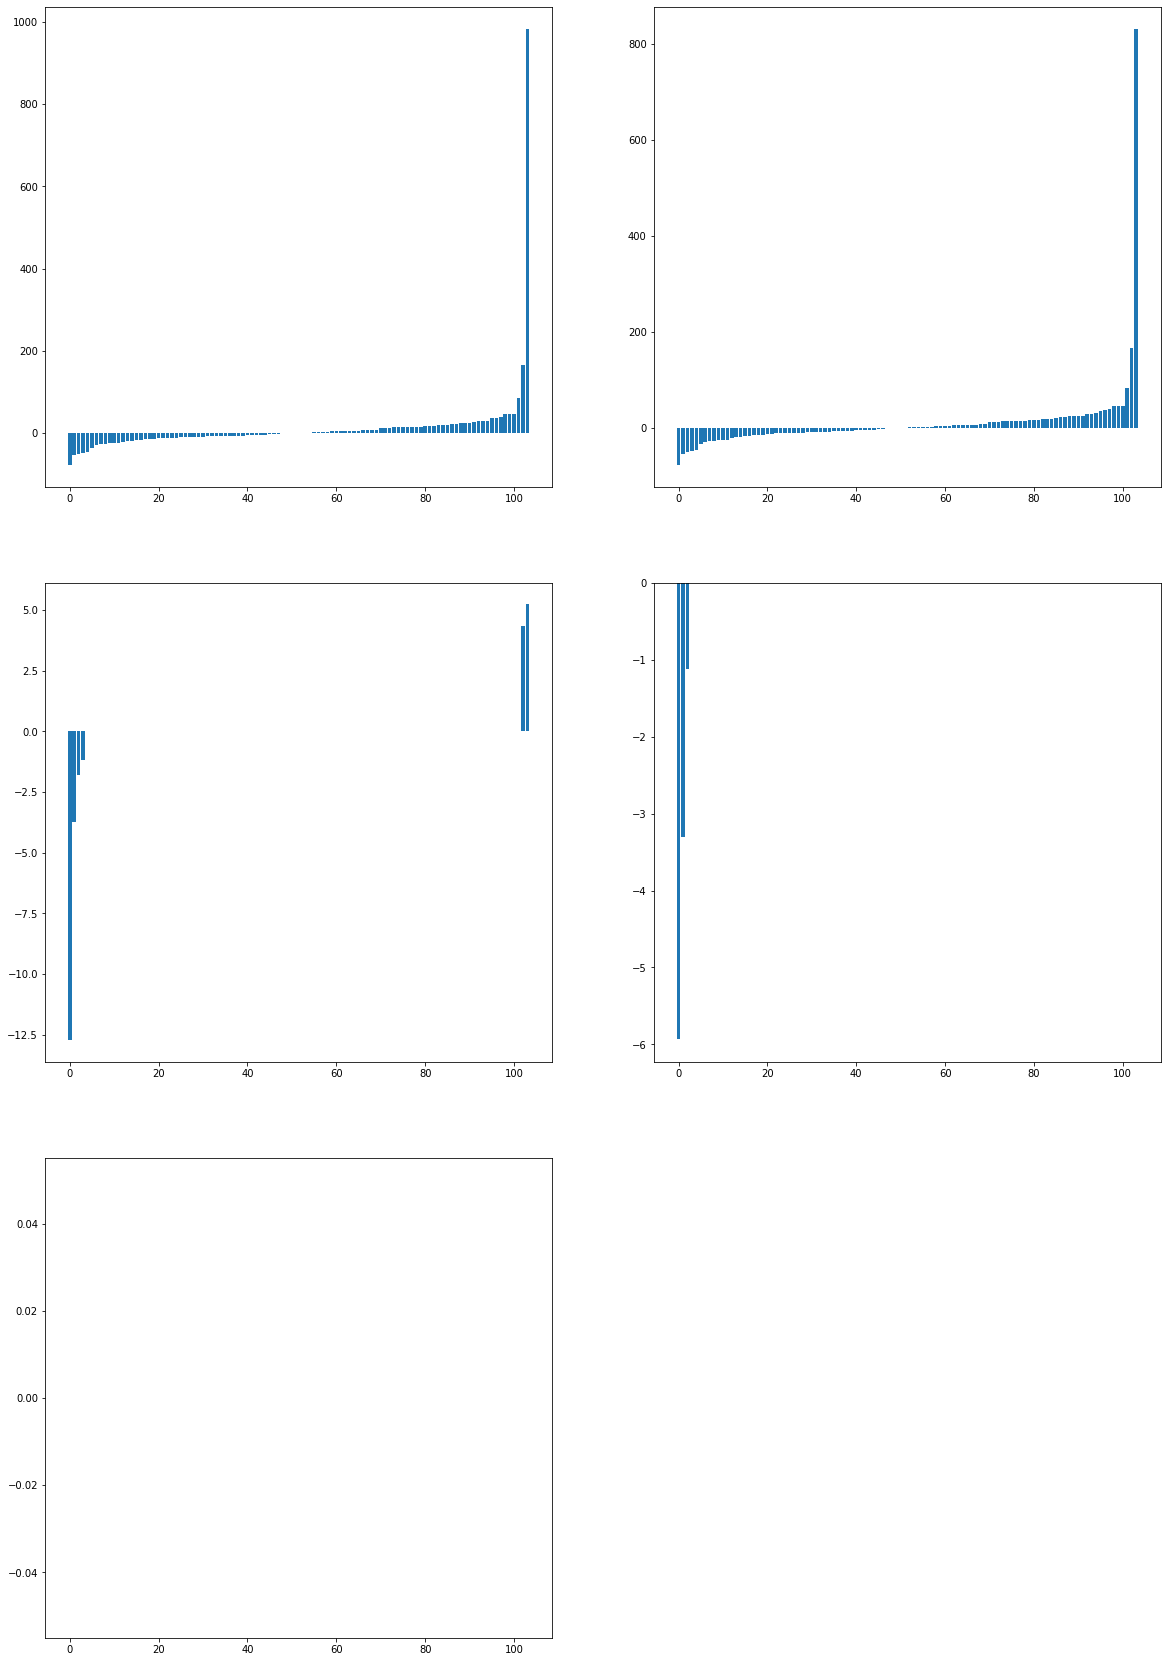

In [79]:
n = np.arange(len(lm.coef_))

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
plt.bar(n, np.sort(lm.coef_, axis=0))

plt.subplot(3,2,2)
plt.bar(n, np.sort(lm1.coef_, axis=0))

plt.subplot(3,2,3)
plt.bar(n, np.sort(lm2.coef_, axis=0))

plt.subplot(3,2,4)
plt.bar(n, np.sort(lm3.coef_, axis=0))

plt.subplot(3,2,5)
plt.bar(n, np.sort(lm4.coef_, axis=0))
plt.show()

In [71]:
lm2.coef_

array([ -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -1.19063449,  -0.        ,   0.        ,
       -12.73724652,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.  

In [70]:
lm6.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.])

In [ ]:
_list = []
for x in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=x)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    _list.append((abs(lm.score(X_train, y_train) - lm.score(X_test, y_test)), x))



In [ ]:
_list